# Pymaceuticals Inc.
---

- In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

- Each of the 249 mice received a different treatment. For this experiment, 10 different types of treatments were applied.

- In our first statistical comparison, it was observed that the second smallest tumor in the mice resulted from the application of Capomulin treatment with a size of 40.67 mm3 on average.

- Secondly, Capomulin was applied in 25 different mice and it was the most used treatment throughout the experiment with a total of 230 days.

- A mouse was taken to analyze its tumor volume evolution over time and the smallest value of its tumor was recorded on day 35 of treatment.

- Finally, with the linear regression tool it is clearly observed that the greater the weight of the mouse, the larger the size of its tumor. In fact, all the mice that take this treatment show that trend on average.

In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data = pd.merge(study_results, mouse_metadata, on='Mouse ID')
# Display only unique ID´s data table for preview
unique_id = data.copy()
unique_id = unique_id.drop_duplicates(subset=['Mouse ID']).reset_index(drop=True)
unique_id.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [133]:
# Checking the number of mice.
number_mice = len(unique_id['Mouse ID'])
number_mice

249

In [134]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data[data.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')]
duplicate_mice = duplicate_mice['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [135]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = data[data['Mouse ID'] == duplicate_mice[0]]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [136]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = data.drop(duplicate_mice_data.index)
data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [137]:
# Checking the number of mice in the clean DataFrame.
len(data['Mouse ID'].unique())

248

## Summary Statistics

In [138]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor,
    'Median Tumor Volume': median_tumor,
    'Tumor Volume Variance': variance_tumor,
    'Tumor Volume Std. Dev.': std_tumor,
    'Tumor Volume Std. Err.': sem_tumor
})

summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [139]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# Of Observed Mouse Timepoints'>

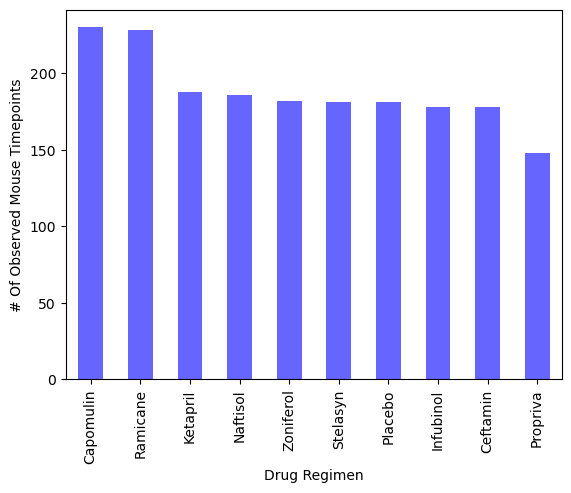

In [152]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = data['Drug Regimen'].value_counts()
drug_regimen.plot(kind='bar', ylabel='# Of Observed Mouse Timepoints', xlabel='Drug Regimen', color='b', alpha = 0.6)

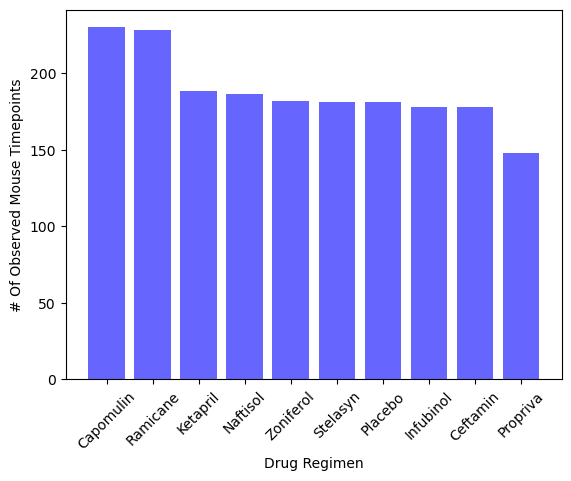

In [141]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen.index, drug_regimen.values, color='blue', alpha = 0.6)
plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Sex'>

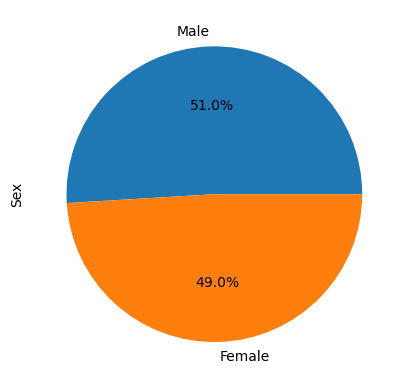

In [142]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = data['Sex'].value_counts()
sex.plot(kind='pie', autopct='%1.1f%%', ylabel='Sex')

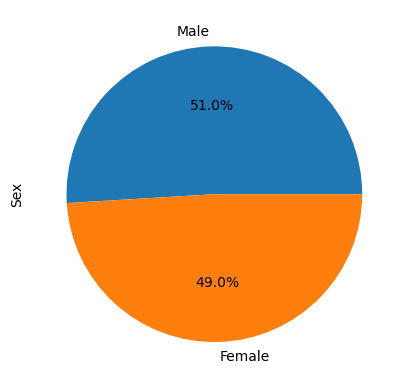

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex.values, labels=sex.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [144]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_df = data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(grouped_df, data, on=['Mouse ID', 'Timepoint'], how='inner')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [145]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_mm3 = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # We will save this values in the tumor_volume_data list
    tumor_volume_data.append(tumor_mm3.tolist())
    # We make calculations for Q1 - 25% and Q3 - 75%
    Q1 = tumor_mm3.quantile(0.25)
    Q3 = tumor_mm3.quantile(0.75)
    IQR = Q3 - Q1
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # We compare: If our tumor_mm3 value is less than the lower bound or greater than the upper bound: It is possible an outlier
    treatment_outliers = tumor_mm3[(tumor_mm3 < lower_bound) | (tumor_mm3 > upper_bound)]
    # We save outliers into a list. Its easier for data manipulation
    outliers = treatment_outliers.tolist()
    
    print(f'Treatment: {drug}, outliers: {outliers}')

Treatment: Capomulin, outliers: []
Treatment: Ramicane, outliers: []
Treatment: Infubinol, outliers: [36.3213458]
Treatment: Ceftamin, outliers: []


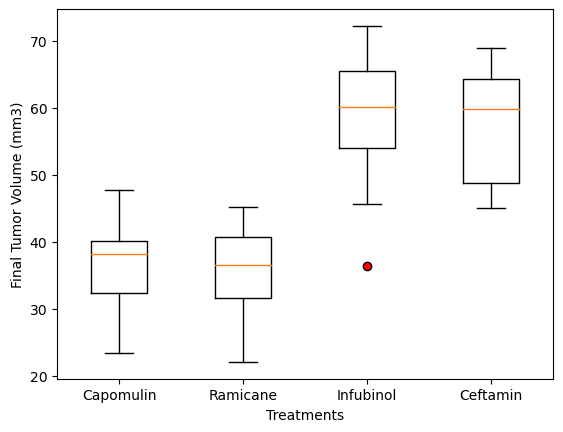

In [146]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(markerfacecolor='red', marker='o'))
plt.xlabel('Treatments')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

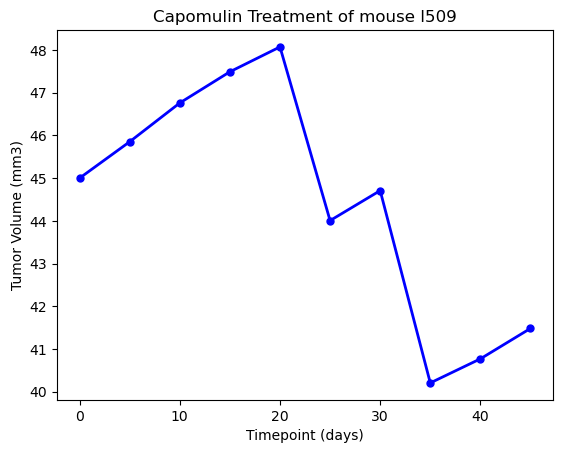

In [158]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# In this case mouse is l509. You can try other mouse id´s
mouse_id = 'l509'
mouse_data = data[data['Mouse ID'] == mouse_id]
timepoints = mouse_data['Timepoint']
tumor_sizes = mouse_data['Tumor Volume (mm3)']
# We plot the tumor volume vs time point
plt.plot(timepoints, tumor_sizes, marker='o', color='b', linewidth=2, markersize=5)
plt.xlabel(f'Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of mouse {mouse_id}')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


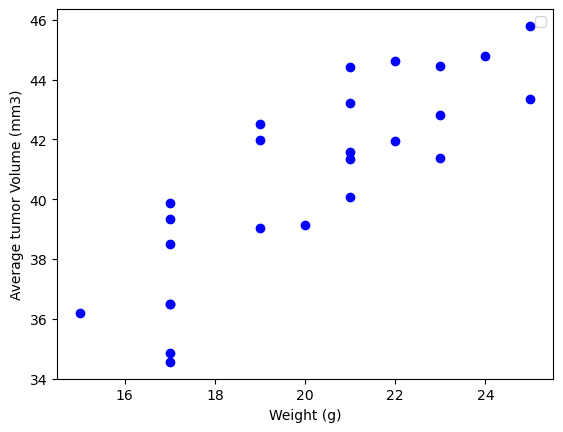

In [148]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_regimen = 'Capomulin'
mouse_data = data[data['Drug Regimen'] == mouse_regimen]
tumor_volume_average = mouse_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
tumor_volume_average['Weight (g)'] = mouse_data.groupby('Mouse ID')['Weight (g)'].first().values

plt.scatter(tumor_volume_average['Weight (g)'], tumor_volume_average['Tumor Volume (mm3)'], color='b')
plt.xlabel('Weight (g)')
plt.ylabel('Average tumor Volume (mm3)')
plt.legend()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


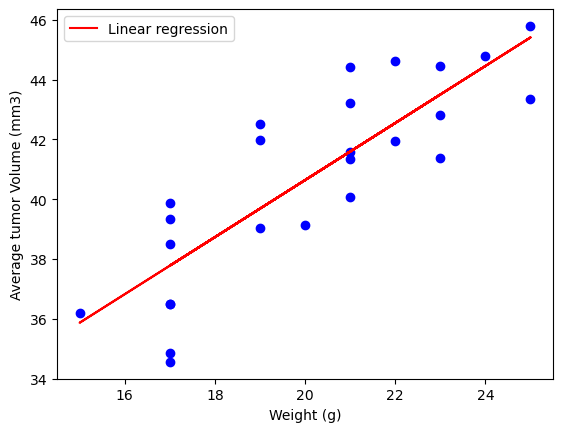

In [149]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, r_value, p_value, std_err = st.linregress(tumor_volume_average['Weight (g)'], tumor_volume_average['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {r_value:.2f}')

# We calculate linear regression and plot the result
regression_line = slope * tumor_volume_average['Weight (g)'] + intercept
plt.scatter(tumor_volume_average['Weight (g)'], tumor_volume_average['Tumor Volume (mm3)'], color='b')
plt.plot(tumor_volume_average['Weight (g)'], regression_line, color='red', label='Linear regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average tumor Volume (mm3)')
plt.legend()
plt.show()
